### **Assignment 01**
# *W.M.N. Witharama*
#*180719L*

---

*Automation and Control Technologies*


In [109]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 5)

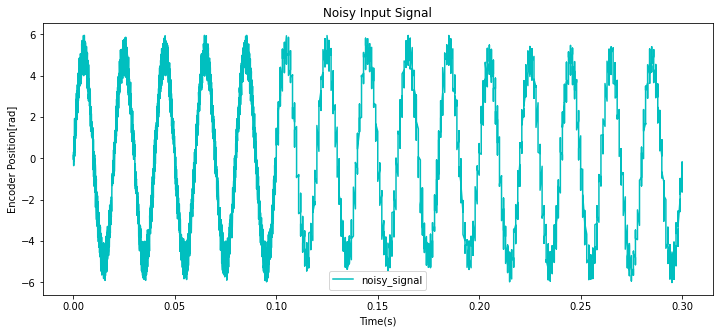

In [110]:
url = 'https://raw.githubusercontent.com/mudithnirmala/Automation-and-Control-Module-Assignments/main/sensor_data.csv'
df = pd.read_csv(url)
df.size
df.plot(x='time',y='noisy_signal',xlabel='Time(s)',ylabel='Encoder Position[rad]',
        title="Noisy Input Signal",color = ['c'])


## Moving Average Filter

---



In [111]:
def moving_average_filter(df,window_size): # data input as a dataframe
  filtered_signal=[]
  for i in range(window_size,len(df['noisy_signal'])):
    window_avg = df['noisy_signal'][i-window_size+1:i+1].mean()
    filtered_signal.append(window_avg)
  df['MAF_output']=[0]*window_size+filtered_signal # zeros were added at the beginning to match the number of time steps

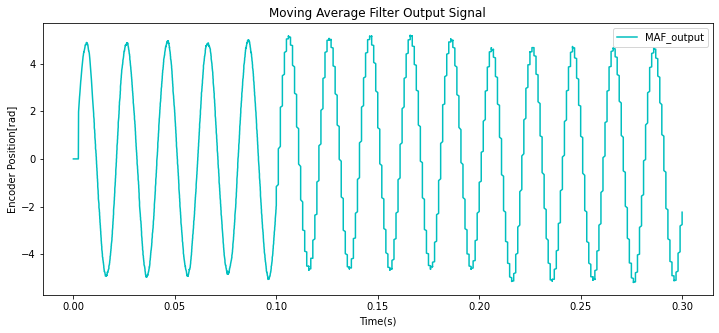

In [112]:
moving_average_filter(df,50)
df.plot(x='time',y='MAF_output',xlabel='Time(s)',ylabel='Encoder Position[rad]',title="Moving Average Filter Output Signal",color = ['c'])

## Single Pole Low Pass Filter(SGS Filter)
---



In [113]:
def sgs_filter(df,g):

  y_list = [0]
  y_prev=df['noisy_signal'][0]
  y_new=0

  for i in range(1,len(df['noisy_signal'])):
    #starting from 2 since I have added X,Y row to the sensor_data.csv file
    #sampling interval is constant in the given dataset
    y_new += g*(df['noisy_signal'][i]-y_prev) # here g = cutoff frequency * sampling interval
    y_prev = y_new
    y_list.append(y_new)

  df["sgs_output"] = y_list

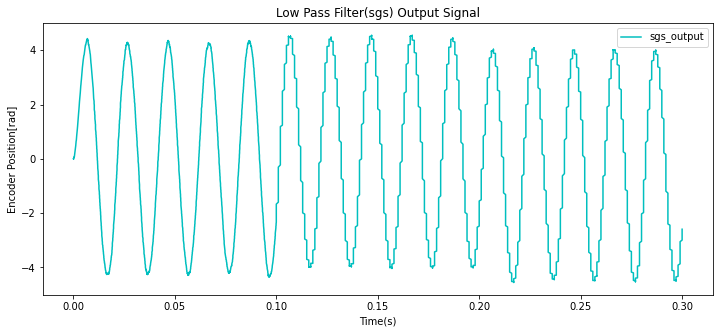

In [114]:
sgs_filter(df,0.025)
df.plot(x='time',y='sgs_output',xlabel='Time(s)',ylabel='Encoder Position[rad]',
            title="Low Pass Filter(sgs) Output Signal",color = ['c'])

## Plot Comparison

---



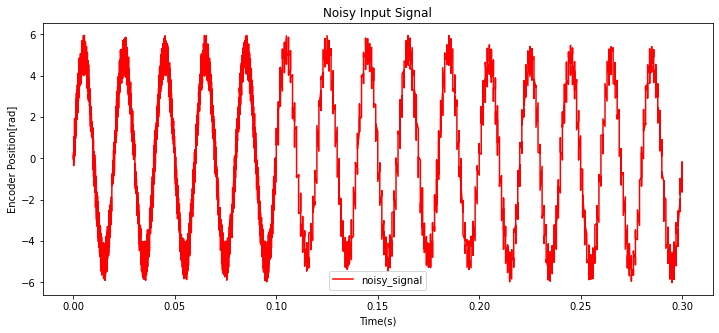

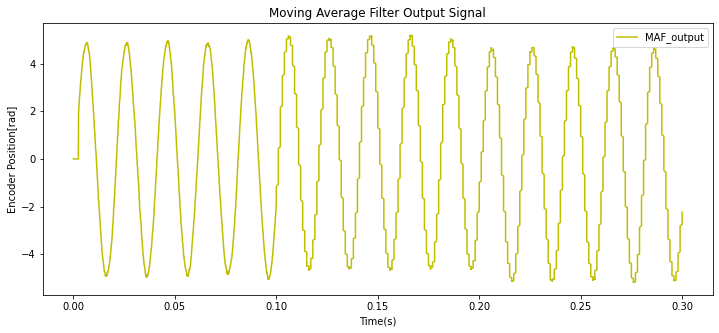

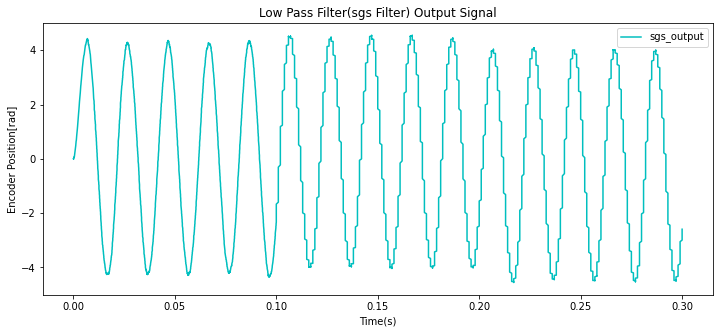

In [115]:
df.plot(x='time',y='noisy_signal',xlabel='Time(s)',ylabel='Encoder Position[rad]',
        title="Noisy Input Signal",color = ['r'])
df.plot(x='time',y='MAF_output',xlabel='Time(s)',ylabel='Encoder Position[rad]',
            title="Moving Average Filter Output Signal",color = ['y'])
df.plot(x='time',y='sgs_output',xlabel='Time(s)',ylabel='Encoder Position[rad]',
            title="Low Pass Filter(sgs Filter) Output Signal",color = ['c'])